# SENTIMENTAL AI
# SnT Summer Project, BCS-IITK
## Assignment-2

Reference- https://github.com/07Agarg/Natural-Language-Processing-In-Tensorflow-Course/blob/master/Week%204/NLP_Week4_Exercise_Shakespeare_Question.ipynb 

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
import tensorflow.keras.utils as ku 
import numpy as np

In [2]:
tokenizer = Tokenizer()
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt
data = open('sonnets.txt').read()



corpus = data.lower().split("\n")  #convert to lower case and then split the data on '\n' to create a corpus of lines
tokenizer.fit_on_texts(corpus) #fit the tokenizer on the corpus
total_words = len(tokenizer.word_index) + 1



# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #(# A Bidirectional LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(LSTM(100))  #(# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu'))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary()) #print model summary

NotImplementedError: Cannot convert a symbolic Tensor (bidirectional_1/forward_lstm_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [4]:
 history = model.fit(predictors, label, epochs=60, verbose=1) #change the number of epochs after observing the plots later on at the point where the accuracy saturates

Epoch 1/100
484/484 [==============================] - 62s 116ms/step - loss: 6.7945 - accuracy: 0.0243
Epoch 2/100
484/484 [==============================] - 57s 118ms/step - loss: 6.4206 - accuracy: 0.0321
Epoch 3/100
484/484 [==============================] - 55s 114ms/step - loss: 6.2019 - accuracy: 0.0368
Epoch 4/100
484/484 [==============================] - 56s 115ms/step - loss: 5.9609 - accuracy: 0.0450
Epoch 5/100
484/484 [==============================] - 56s 115ms/step - loss: 5.6871 - accuracy: 0.0548
Epoch 6/100
484/484 [==============================] - 55s 114ms/step - loss: 5.4094 - accuracy: 0.0730
Epoch 7/100
484/484 [==============================] - 57s 117ms/step - loss: 5.1386 - accuracy: 0.0837
Epoch 8/100
484/484 [==============================] - 55s 114ms/step - loss: 4.8553 - accuracy: 0.1001
Epoch 9/100
484/484 [==============================] - 55s 115ms/step - loss: 4.5399 - accuracy: 0.1208
Epoch 10/100
484/484 [==============================] - 55s 114m

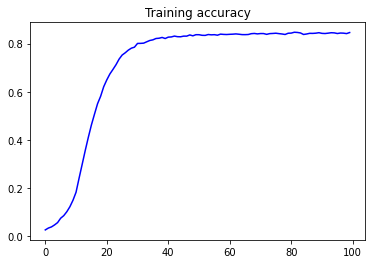

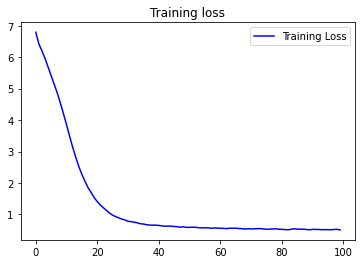

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [20]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100 #Play with this quantity to change the number of words you want to see in the output after the seed_text

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x = model.predict(token_list)
  classes_x = np.argmax(predict_x, axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == classes_x:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Just because you are correct, does not mean that you are right seen reap seen reap hate ' seen lips of night days ' seen stand back up in thine deeds away thee or green my mind rare rare rare rare 'no ' alone ' seen seen mind halt friend ' ' back to go told more head ' bright of worth bearing him of art of art of worth of you ' in worth of you ' more nearly bright eyes of you bearing none lips of trust of pry in you more in more in more more in more in more in more in more more in more in more
